In [153]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matyplotlib -rf

Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [154]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import random

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

BASE = Path.cwd().parents[1] / "python-server" / "app" / "data_pipeline"

# 최신 파이프라인 기준 파일
SKU_PATH = BASE / "sku_catalog_ml_with_share.csv"
SALES_PATH = BASE / "weekly_sales.csv"
FEATURES_PATH = BASE / "features_all.csv"
PRED_PATH = BASE / "eval_2025_pred_vs_actual.csv"   # 07_train_model.py가 생성한 파일

print(SKU_PATH, SALES_PATH, FEATURES_PATH, PRED_PATH)


C:\Users\chosw\ORDER101_AI_LAST_134\be18-fin-SYNERGY-ORDER101\python-server\app\data_pipeline\sku_catalog_ml_with_share.csv C:\Users\chosw\ORDER101_AI_LAST_134\be18-fin-SYNERGY-ORDER101\python-server\app\data_pipeline\weekly_sales.csv C:\Users\chosw\ORDER101_AI_LAST_134\be18-fin-SYNERGY-ORDER101\python-server\app\data_pipeline\features_all.csv C:\Users\chosw\ORDER101_AI_LAST_134\be18-fin-SYNERGY-ORDER101\python-server\app\data_pipeline\eval_2025_pred_vs_actual.csv


In [156]:
df_sku = pd.read_csv(SKU_PATH)
df_sales = pd.read_csv(SALES_PATH, parse_dates=["target_date"])
df_feat = pd.read_csv(FEATURES_PATH, parse_dates=["target_date"])
df_pred = pd.read_csv(PRED_PATH, parse_dates=["target_date"])

print("SKU rows:", len(df_sku))
print("Sales rows:", len(df_sales))
print("Features rows:", len(df_feat))
print("Pred rows:", len(df_pred))

df_sales.head()


SKU rows: 206
Sales rows: 53766
Features rows: 51294
Pred rows: 10712


,target_date,warehouse_id,store_id,sku_id,actual_order_qty
0,2021-01-04,1,1,1,18
1,2021-01-04,1,1,2,0
2,2021-01-04,1,1,3,15
3,2021-01-04,1,1,4,18
4,2021-01-04,1,1,5,0


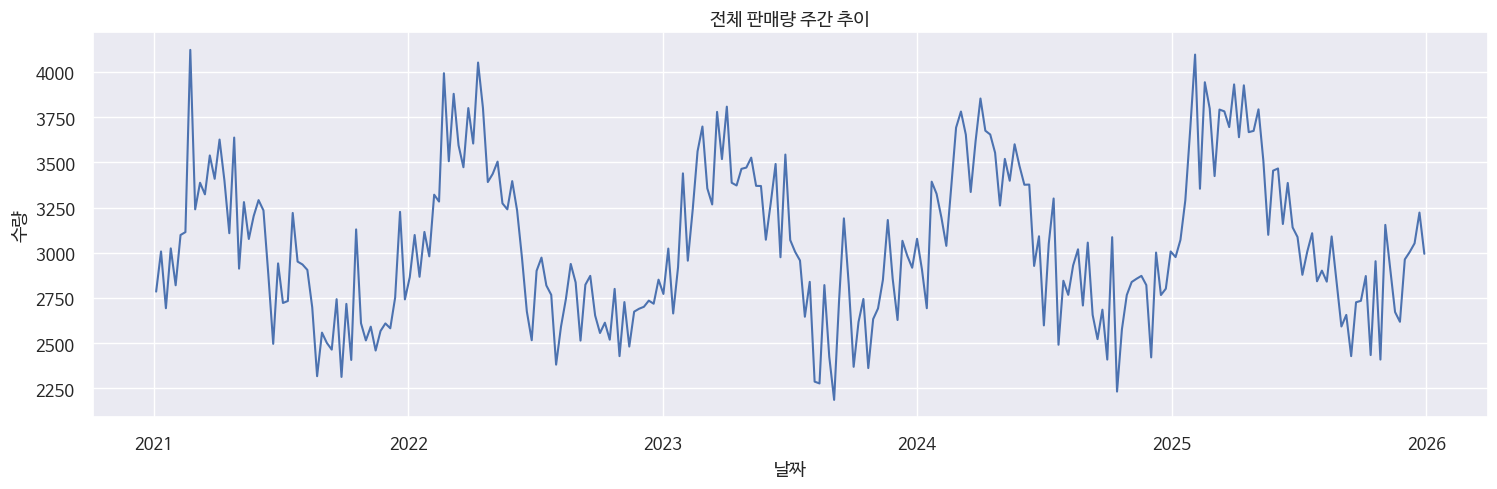

,target_date,actual_order_qty
0,2021-01-04,2785
1,2021-01-11,3007
2,2021-01-18,2693
3,2021-01-25,3024
4,2021-02-01,2820


In [157]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

ts_total = (
    df_sales
    .groupby("target_date")["actual_order_qty"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(18,5))
plt.plot(ts_total["target_date"], ts_total["actual_order_qty"])
plt.title("전체 판매량 주간 추이")
plt.ylabel("수량")
plt.xlabel("날짜")
plt.grid(True)
plt.show()

ts_total.head()


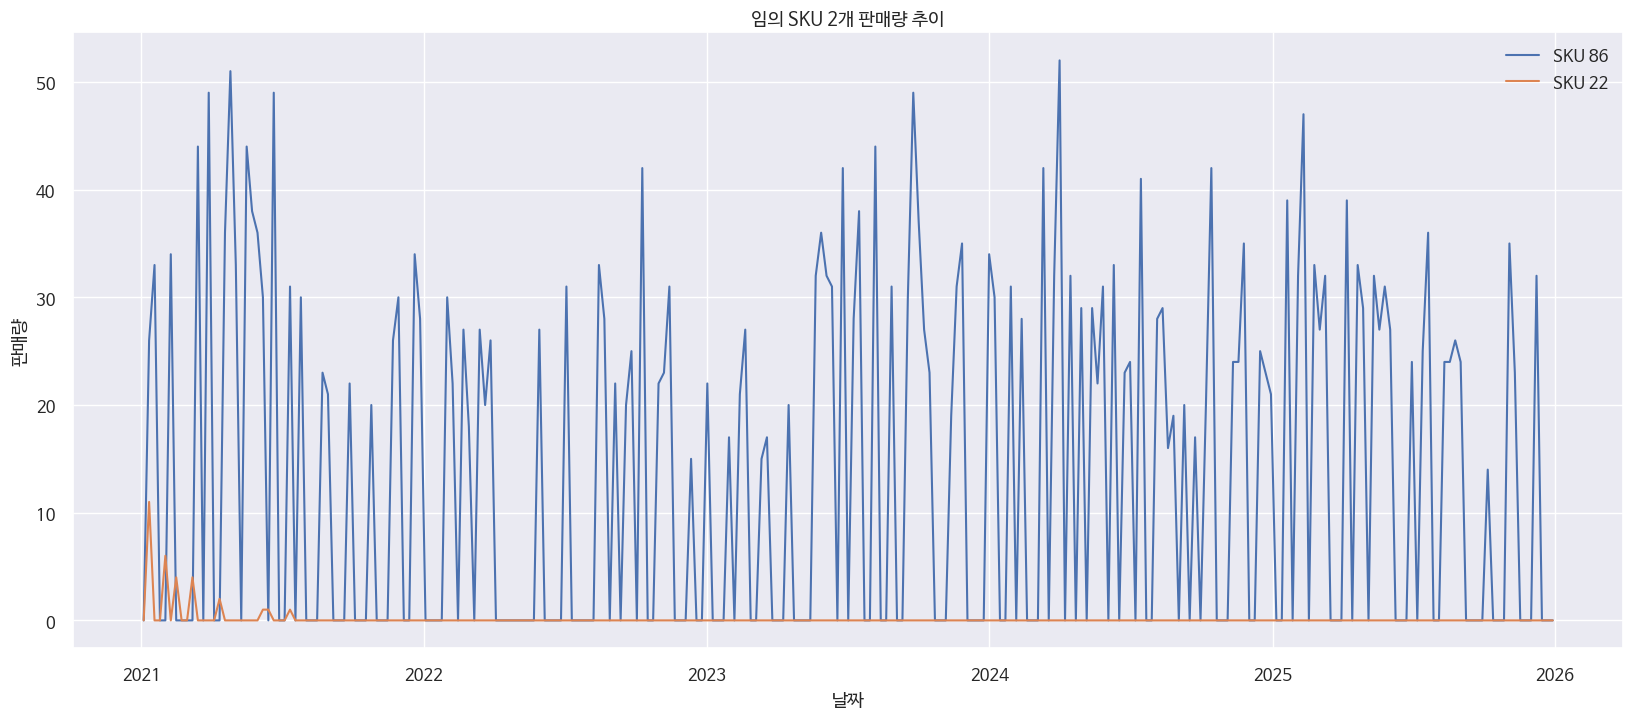

In [183]:
sample_skus = random.sample(df_sales["sku_id"].unique().tolist(), 2)
sample_skus


plt.figure(figsize=(20,8))

for sku in sample_skus:
    sub = df_sales[df_sales["sku_id"] == sku]
    plt.plot(sub["target_date"], sub["actual_order_qty"], label=f"SKU {sku}")

plt.title("임의 SKU 2개 판매량 추이")
plt.xlabel("날짜")
plt.ylabel("판매량")
plt.legend()
plt.grid(True)
plt.show()


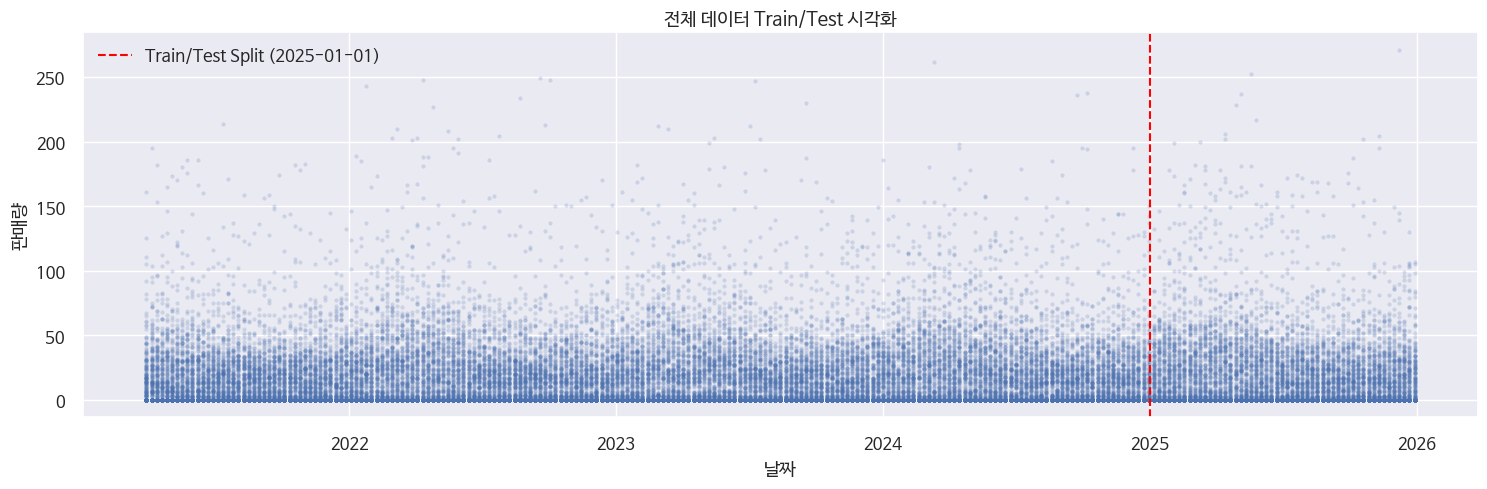

In [178]:
boundary = pd.Timestamp("2025-01-01")

plt.figure(figsize=(18,5))
plt.plot(df_feat["target_date"], df_feat["actual_order_qty"], ".", alpha=0.2)

plt.axvline(boundary, color="red", linestyle="--", label="Train/Test Split (2025-01-01)")

plt.title("전체 데이터 Train/Test 시각화")
plt.xlabel("날짜")
plt.ylabel("판매량")
plt.legend()
plt.show()


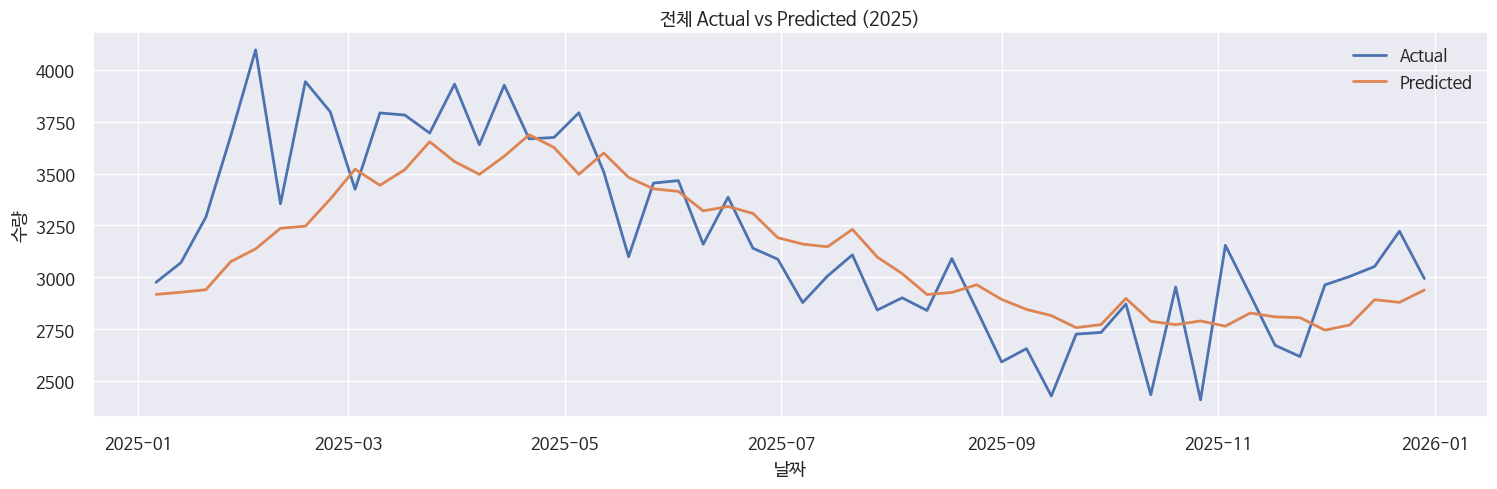

In [179]:
ts_pred = (
    df_pred.groupby("target_date")[["y", "y_pred"]]
    .sum()
    .reset_index()
)

plt.figure(figsize=(18,5))
plt.plot(ts_pred["target_date"], ts_pred["y"], label="Actual", linewidth=2)
plt.plot(ts_pred["target_date"], ts_pred["y_pred"], label="Predicted", linewidth=2)
plt.title("전체 Actual vs Predicted (2025)")
plt.xlabel("날짜")
plt.ylabel("수량")
plt.legend()
plt.grid(True)
plt.show()


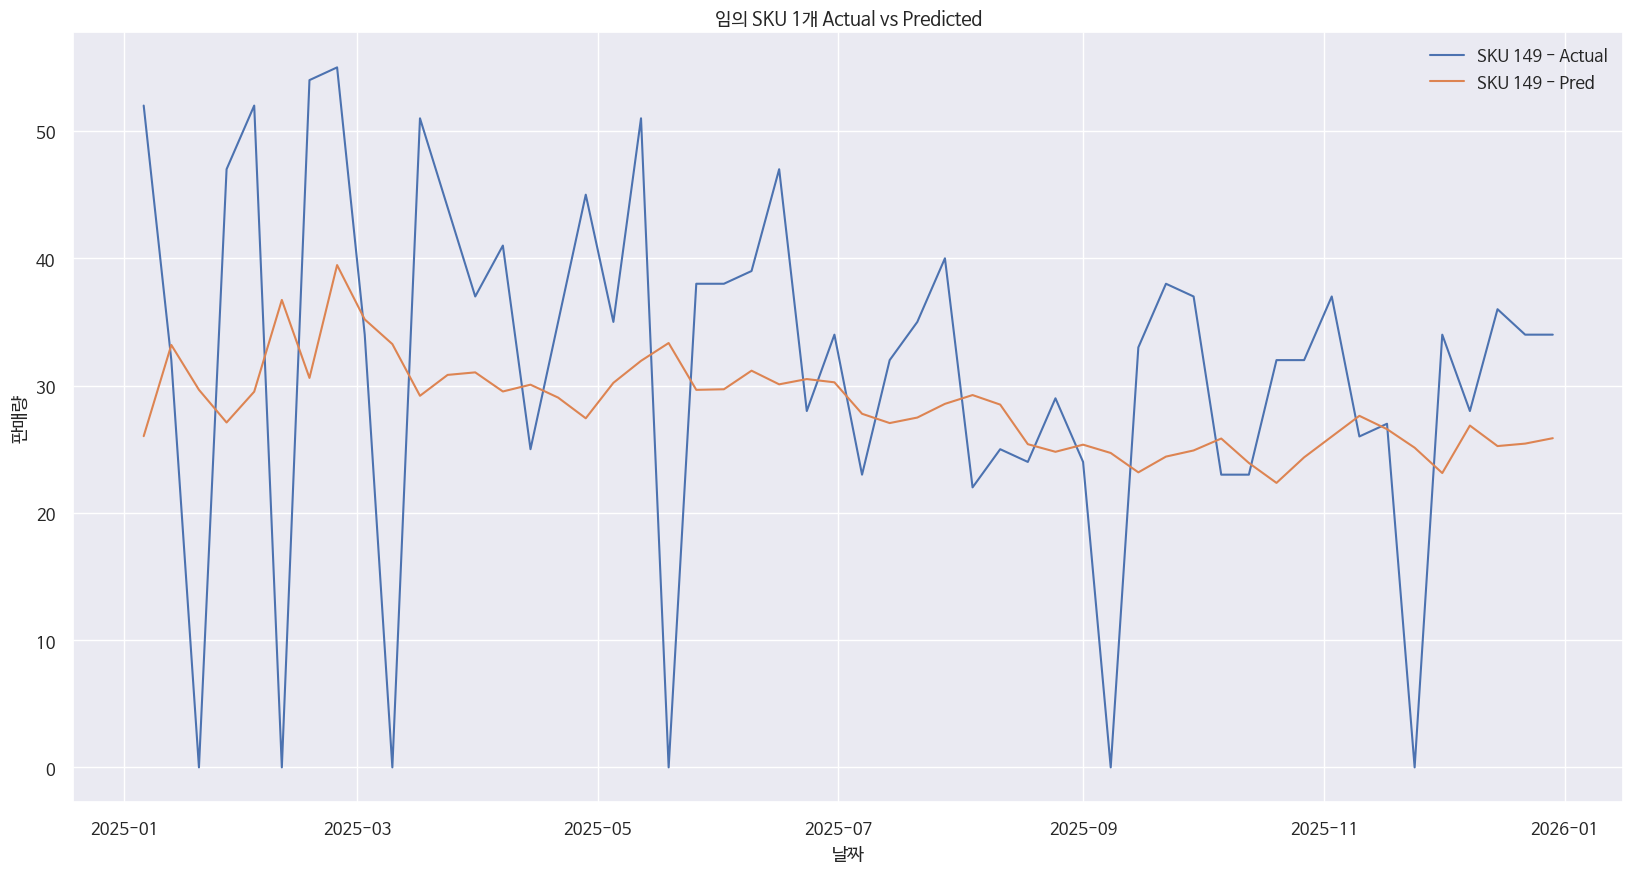

[149]

In [181]:
sample_skus_pred = random.sample(df_pred["sku_id"].unique().tolist(), 1)

plt.figure(figsize=(20,10))

for sku in sample_skus_pred:
    sub = df_pred[df_pred["sku_id"] == sku]
    plt.plot(sub["target_date"], sub["y"], label=f"SKU {sku} - Actual")
    plt.plot(sub["target_date"], sub["y_pred"], label=f"SKU {sku} - Pred")

plt.title("임의 SKU 1개 Actual vs Predicted")
plt.xlabel("날짜")
plt.ylabel("판매량")
plt.legend()
plt.grid(True)
plt.show()

sample_skus_pred


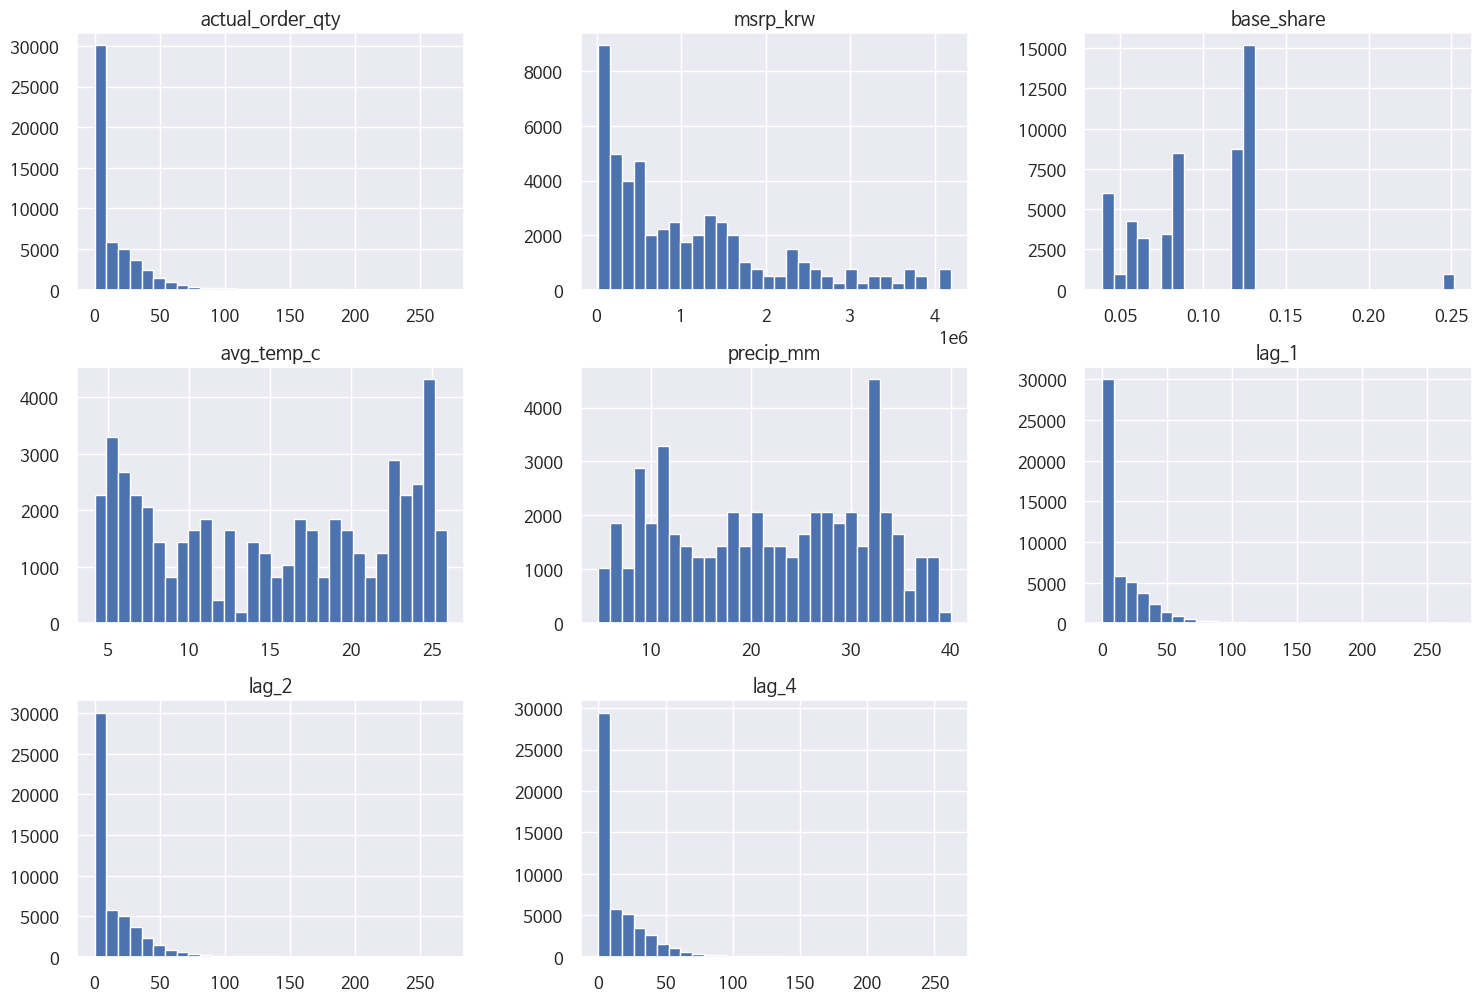

In [163]:
num_cols = ["actual_order_qty", "msrp_krw", "base_share",
            "avg_temp_c", "precip_mm", "lag_1", "lag_2", "lag_4"]

df_feat[num_cols].hist(figsize=(18,12), bins=30)
plt.show()
s

C:\Users\chosw\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
C:\Users\chosw\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


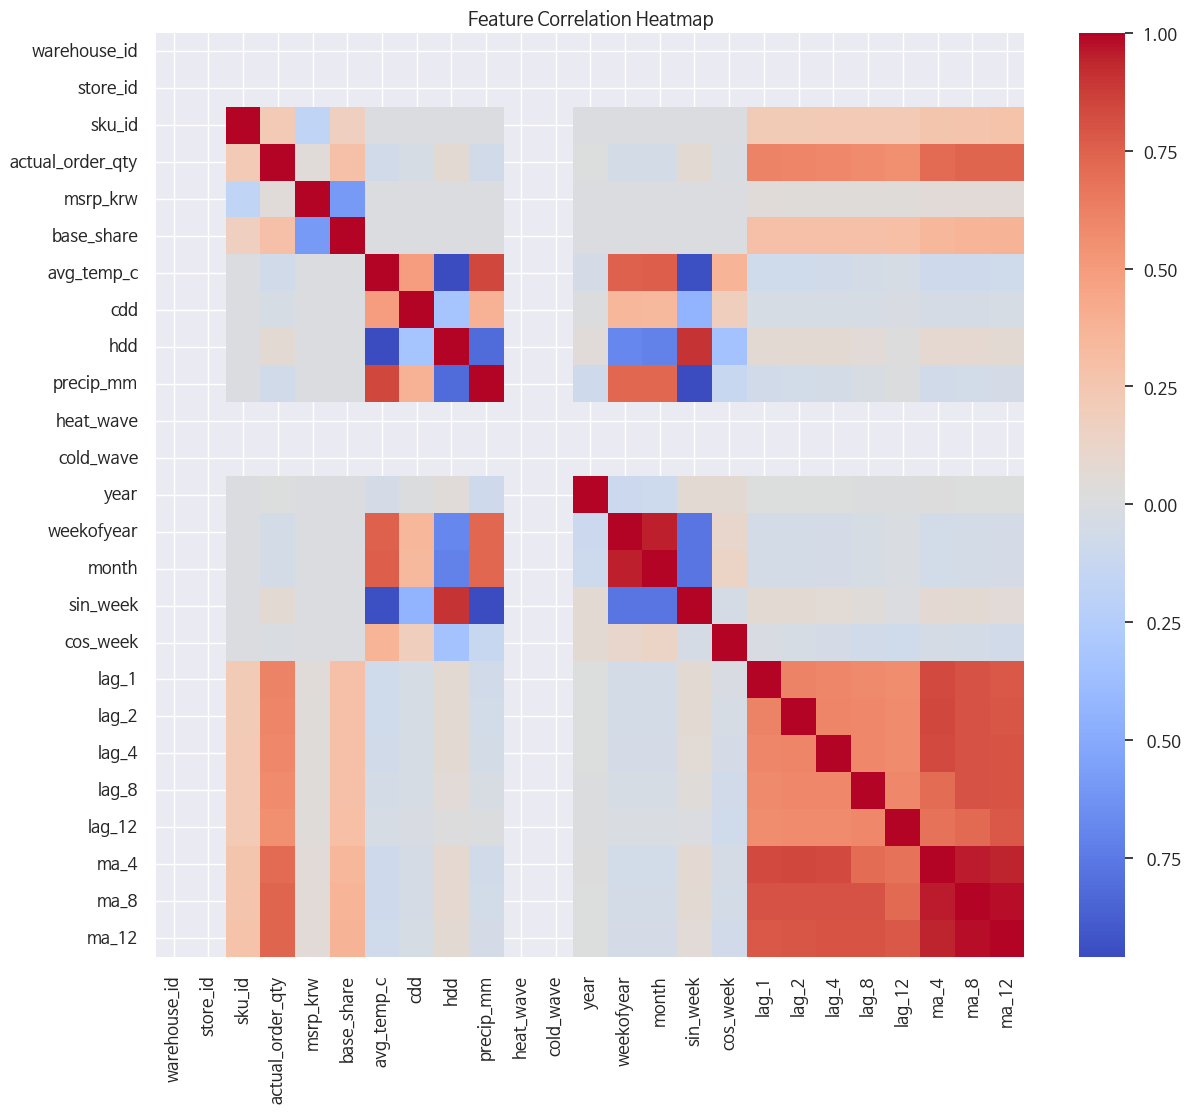

In [164]:
plt.figure(figsize=(14,12))
sns.heatmap(df_feat.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


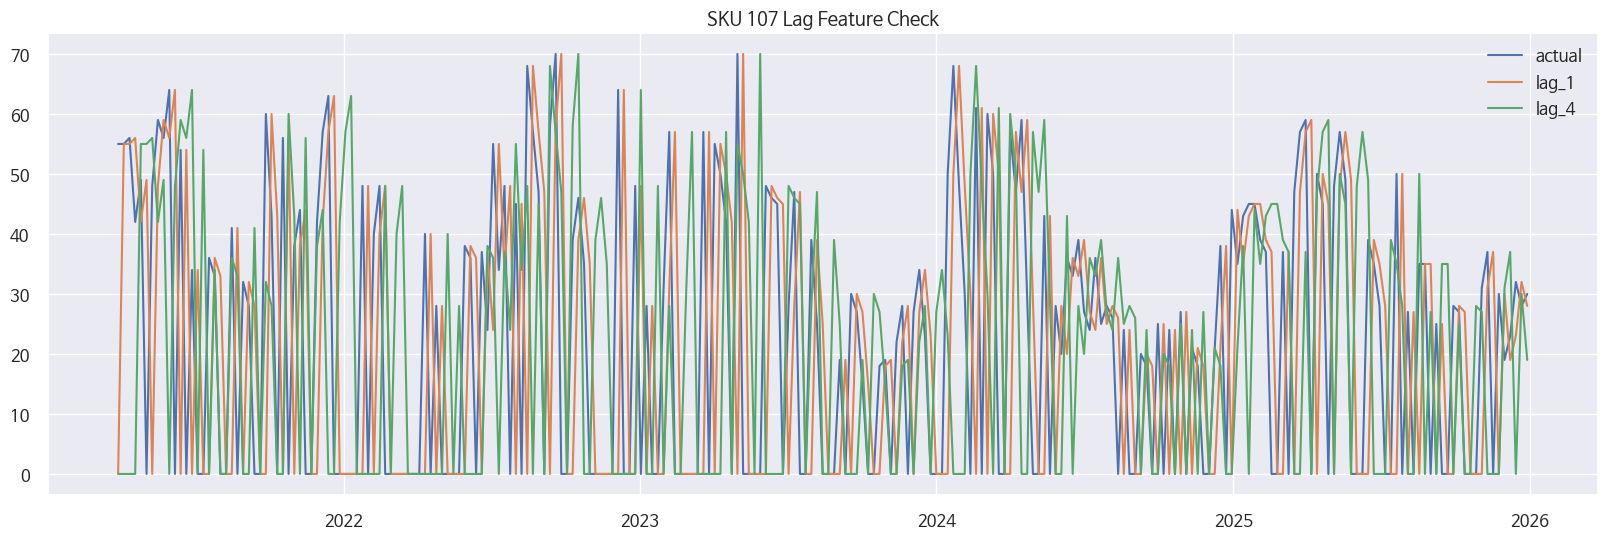

In [165]:
sku = random.choice(df_feat["sku_id"].unique().tolist())

sub = df_feat[df_feat["sku_id"] == sku].sort_values("target_date")

plt.figure(figsize=(20,6))
plt.plot(sub["target_date"], sub["actual_order_qty"], label="actual")
plt.plot(sub["target_date"], sub["lag_1"], label="lag_1")
plt.plot(sub["target_date"], sub["lag_4"], label="lag_4")
plt.legend()
plt.title(f"SKU {sku} Lag Feature Check")
plt.grid(True)
plt.show()


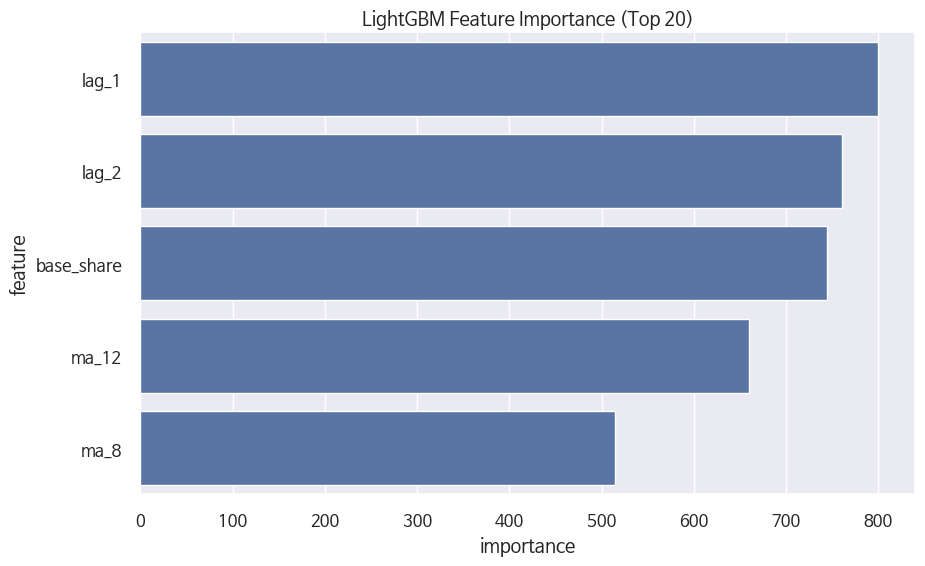

In [166]:
import joblib
MODEL_PATH = BASE / "lightgbm_model.pkl"
model = joblib.load(MODEL_PATH)

importances = model.feature_importance()
columns = model.feature_name()

feat_imp = pd.DataFrame({"feature": columns, "importance": importances})
feat_imp = feat_imp.sort_values("importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x="importance", y="feature")
plt.title("LightGBM Feature Importance (Top 20)")
plt.show()
